In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

df = pd.merge(city_df, ride_df,how = 'left', on="city")
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [15]:
#Average Fare ($) Per City
ave_fare = round(df.groupby('city')['fare'].sum() / df.groupby('city')['ride_id'].count(),2)
fare = round(df.groupby('city')['fare'].sum(),2)
#Total Number of Rides Per City
total_ride = df.groupby('city')['ride_id'].count()
#Total Number of Drivers Per City
driver_number = df.groupby('city')['driver_count'].unique().str.get(0)
#City Type (Urban, Suburban, Rural)
city_type = df.groupby('city')['type'].unique().str.get(0)
df1 = pd.concat([ave_fare,fare,total_ride,driver_number,city_type],axis=1,keys = ['Average Fare ($)','Total Fare ($)','Total Number of Rides','Total Number of Drivers','City Type'])
df1.head()

,Average Fare ($),Total Fare ($),Total Number of Rides,Total Number of Drivers,City Type
city,,,,,
Amandaburgh,24.64,443.55,18,12,Urban
Barajasview,25.33,557.31,22,26,Urban
Barronchester,36.42,582.76,16,11,Suburban
Bethanyland,32.96,593.21,18,22,Suburban
Bradshawfurt,40.06,400.64,10,7,Rural


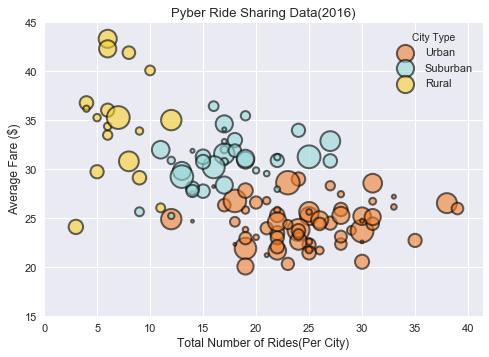

In [16]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("darkgrid")  #ticks
city_type_colors = ['#F08030','#98D8D8','#F8D030']
sns.lmplot('Total Number of Rides', # Horizontal axis
           'Average Fare ($)', # Vertical axis
           data=df1, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='City Type',legend_out=False,aspect=1.4,palette=city_type_colors,scatter_kws={"s" :8*df1['Total Number of Drivers'],'alpha':0.6,'edgecolors':"black",'linewidth':2}) # Set color # S marker size

plt.ylim(15, None)
plt.xlim(0, None)
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2016)")

plt.show()

In [17]:
#% of Total Fares by City Type
total_fare = round(df1.groupby('City Type')['Total Fare ($)'].sum(),2)
#% of Total Rides by City Type
total_rides = df1.groupby('City Type')['Total Number of Rides'].sum()
#% of Total Drivers by City Type
total_drivers = df1.groupby('City Type')['Total Number of Drivers'].sum()
df2 = pd.concat([total_fare,total_rides,total_drivers],axis=1,keys = ['Total Fare ($)','Total Number of Rides','Total Number of Drivers'])
df2.head()

,Total Fare ($),Total Number of Rides,Total Number of Drivers
City Type,,,
Rural,4327.93,125,78
Suburban,19356.33,625,490
Urban,39854.38,1625,2405


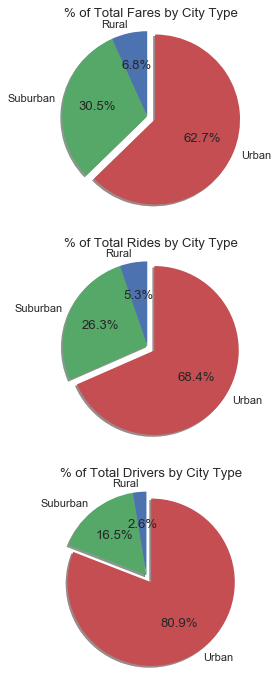

In [18]:
labels = 'Rural','Suburban','Urban'
explode = (0, 0, 0.1) 

fig, ax = plt.subplots(3, 1, figsize=(4, 12))
ax[0].pie(df2['Total Fare ($)'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('% of Total Fares by City Type')

ax[1].pie(df2['Total Number of Rides'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('% of Total Rides by City Type')

ax[2].pie(df2['Total Number of Drivers'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].axis('equal')
ax[2].set_title('% of Total Drivers by City Type')

plt.show()